In [16]:
import pyupbit as pu
import numpy as np
import pandas as pd
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt 

In [31]:
df = pu.get_ohlcv("KRW-SOL",interval="minute60",count=100000)
df.to_csv("dataset_SOL1.csv")
df


,open,high,low,close,volume,value
2021-10-15 15:00:00,159700.0,246050.0,159700.0,198100.0,1.797373e+06,3.726380e+11
2021-10-15 16:00:00,198400.0,202150.0,194050.0,197550.0,4.678498e+05,9.259893e+10
2021-10-15 17:00:00,197550.0,231500.0,191850.0,194650.0,1.371446e+06,2.815739e+11
2021-10-15 18:00:00,194700.0,197700.0,190050.0,196550.0,2.890991e+05,5.629970e+10
2021-10-15 19:00:00,196500.0,196900.0,192500.0,194700.0,1.134453e+05,2.207843e+10
...,...,...,...,...,...,...
2025-02-13 17:00:00,292250.0,292700.0,290200.0,290450.0,1.744769e+04,5.083571e+09
2025-02-13 18:00:00,290750.0,292600.0,290050.0,292250.0,1.261289e+04,3.678804e+09
2025-02-13 19:00:00,292250.0,292500.0,291000.0,291150.0,7.193208e+03,2.097900e+09
2025-02-13 20:00:00,291150.0,291550.0,289200.0,290100.0,1.633468e+04,4.739565e+09


In [36]:
df = pd.read_csv("dataset_SOL1.csv")
df_dict = {}
for i in range(len(df)):
    if df["Unnamed: 0"][i][:10] in df_dict:
        df_dict[df["Unnamed: 0"][i][:10]]+=1
    else:
        df_dict[df["Unnamed: 0"][i][:10]]=1

sorted_dict = sorted(df_dict.items(), key= lambda item:item[1], reverse=False)
print(sorted_dict)
print(len(df))

[('2021-10-15', 9), ('2023-04-24', 19), ('2023-12-04', 19), ('2024-04-01', 20), ('2024-10-14', 20), ('2022-07-01', 21), ('2023-04-01', 21), ('2023-08-09', 21), ('2024-01-01', 21), ('2024-07-01', 21), ('2025-01-01', 21), ('2022-01-01', 22), ('2023-01-01', 22), ('2023-07-12', 22), ('2025-02-13', 22), ('2021-11-15', 23), ('2022-02-14', 23), ('2022-05-24', 23), ('2022-10-01', 23), ('2025-01-03', 23), ('2021-10-16', 24), ('2021-10-17', 24), ('2021-10-18', 24), ('2021-10-19', 24), ('2021-10-20', 24), ('2021-10-21', 24), ('2021-10-22', 24), ('2021-10-23', 24), ('2021-10-24', 24), ('2021-10-25', 24), ('2021-10-26', 24), ('2021-10-27', 24), ('2021-10-28', 24), ('2021-10-29', 24), ('2021-10-30', 24), ('2021-10-31', 24), ('2021-11-01', 24), ('2021-11-02', 24), ('2021-11-03', 24), ('2021-11-04', 24), ('2021-11-05', 24), ('2021-11-06', 24), ('2021-11-07', 24), ('2021-11-08', 24), ('2021-11-09', 24), ('2021-11-10', 24), ('2021-11-11', 24), ('2021-11-12', 24), ('2021-11-13', 24), ('2021-11-14', 24), 

In [ ]:
hour = int(df["Unnamed: 0"][1].split(" ")[1].split(":")[0])
hour

1

In [37]:
import pandas as pd
from datetime import datetime, timedelta

# 데이터 불러오기
file_path = 'dataset_SOL1.csv'
df = pd.read_csv(file_path)

# Unnamed: 0 열을 datetime 형식으로 변환
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

# 시간 간격이 1시간이 아닌 부분을 찾아서 행 추가
new_rows = []
for i in range(1, len(df)):
    new_rows.append(df.iloc[i-1])
    time_diff = df['Unnamed: 0'].iloc[i] - df['Unnamed: 0'].iloc[i-1]
    if time_diff > timedelta(hours=1):
        missing_hours = int(time_diff.total_seconds() // 3600) - 1
        for h in range(1, missing_hours + 1):
            new_row = df.iloc[i-1].copy()
            new_row['Unnamed: 0'] = df['Unnamed: 0'].iloc[i-1] + timedelta(hours=h)
            new_rows.append(new_row)
new_rows.append(df.iloc[-1])

# 새로운 데이터프레임 생성
new_df = pd.DataFrame(new_rows).reset_index(drop=True)

# 변환된 데이터 저장
output_path = 'modified_dataset_SOL1.csv'
new_df.to_csv(output_path, index=False)


In [41]:
tickers = pu.get_tickers(fiat="KRW")
len(tickers)
tickers

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-ADA',
 'KRW-POWR',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-HIFI',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-BOUNTY',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-GAME2',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TOKAMAK',
 'KRW-SXP',
 'KRW-HUNT',
 'KRW-DOT',
 'KRW-MVL',
 'KRW-STRAX',
 'KRW-AQT',
 'KRW-GLM',
 'KRW-META

In [39]:
df.columns.values[0] = 'datetime'
df

,datetime,open,high,low,close,volume,value
0,2021-10-15 15:00:00,159700.0,246050.0,159700.0,198100.0,1.797373e+06,3.726380e+11
1,2021-10-15 16:00:00,198400.0,202150.0,194050.0,197550.0,4.678498e+05,9.259893e+10
2,2021-10-15 17:00:00,197550.0,231500.0,191850.0,194650.0,1.371446e+06,2.815739e+11
3,2021-10-15 18:00:00,194700.0,197700.0,190050.0,196550.0,2.890991e+05,5.629970e+10
4,2021-10-15 19:00:00,196500.0,196900.0,192500.0,194700.0,1.134453e+05,2.207843e+10
...,...,...,...,...,...,...,...
29163,2025-02-13 17:00:00,292250.0,292700.0,290200.0,290450.0,1.744769e+04,5.083571e+09
29164,2025-02-13 18:00:00,290750.0,292600.0,290050.0,292250.0,1.261289e+04,3.678804e+09
29165,2025-02-13 19:00:00,292250.0,292500.0,291000.0,291150.0,7.193208e+03,2.097900e+09
29166,2025-02-13 20:00:00,291150.0,291550.0,289200.0,290100.0,1.633468e+04,4.739565e+09


In [21]:
df = pd.read_csv("modified_dataset_SOL1.csv")
df_dict = {}
for i in range(len(df)):
    if df["Unnamed: 0"][i][:10] in df_dict:
        df_dict[df["Unnamed: 0"][i][:10]]+=1
    else:
        df_dict[df["Unnamed: 0"][i][:10]]=1

sorted_dict = sorted(df_dict.items(), key= lambda item:item[1], reverse=False)
print(sorted_dict)
print(len(df))

[('2025-02-13', 20), ('2021-10-16', 24), ('2021-10-17', 24), ('2021-10-18', 24), ('2021-10-19', 24), ('2021-10-20', 24), ('2021-10-21', 24), ('2021-10-22', 24), ('2021-10-23', 24), ('2021-10-24', 24), ('2021-10-25', 24), ('2021-10-26', 24), ('2021-10-27', 24), ('2021-10-28', 24), ('2021-10-29', 24), ('2021-10-30', 24), ('2021-10-31', 24), ('2021-11-01', 24), ('2021-11-02', 24), ('2021-11-03', 24), ('2021-11-04', 24), ('2021-11-05', 24), ('2021-11-06', 24), ('2021-11-07', 24), ('2021-11-08', 24), ('2021-11-09', 24), ('2021-11-10', 24), ('2021-11-11', 24), ('2021-11-12', 24), ('2021-11-13', 24), ('2021-11-14', 24), ('2021-11-15', 24), ('2021-11-16', 24), ('2021-11-17', 24), ('2021-11-18', 24), ('2021-11-19', 24), ('2021-11-20', 24), ('2021-11-21', 24), ('2021-11-22', 24), ('2021-11-23', 24), ('2021-11-24', 24), ('2021-11-25', 24), ('2021-11-26', 24), ('2021-11-27', 24), ('2021-11-28', 24), ('2021-11-29', 24), ('2021-11-30', 24), ('2021-12-01', 24), ('2021-12-02', 24), ('2021-12-03', 24),

In [22]:
df = pu.get_ohlcv("KRW-BTC", interval="minute60", count=100000)
df

,open,high,low,close,volume,value
2017-09-25 12:00:00,4201000.0,4244000.0,4191000.0,4202000.0,98.210406,4.142651e+08
2017-09-25 13:00:00,4222000.0,4235000.0,4208000.0,4235000.0,7.656490,3.230358e+07
2017-09-25 17:00:00,4235000.0,4235000.0,4235000.0,4235000.0,0.000030,1.270500e+02
2017-09-25 19:00:00,4213000.0,4213000.0,4187000.0,4204000.0,0.914286,3.832582e+06
2017-09-25 20:00:00,4204000.0,4204000.0,4175000.0,4191000.0,2.197385,9.211909e+06
...,...,...,...,...,...,...
2025-02-13 17:00:00,145425000.0,145559000.0,144872000.0,144966000.0,89.562522,1.299570e+10
2025-02-13 18:00:00,144966000.0,145775000.0,144870000.0,145552000.0,63.008524,9.163423e+09
2025-02-13 19:00:00,145552000.0,145720000.0,145334000.0,145359000.0,28.634960,4.166353e+09
2025-02-13 20:00:00,145350000.0,145663000.0,144700000.0,144976000.0,64.055049,9.294517e+09


In [28]:
df.columns.values[0] = 'datetime'
df

,datetime,high,datetime,close,volume,value
2017-09-25 12:00:00,4201000.0,4244000.0,4191000.0,4202000.0,98.210406,4.142651e+08
2017-09-25 13:00:00,4222000.0,4235000.0,4208000.0,4235000.0,7.656490,3.230358e+07
2017-09-25 17:00:00,4235000.0,4235000.0,4235000.0,4235000.0,0.000030,1.270500e+02
2017-09-25 19:00:00,4213000.0,4213000.0,4187000.0,4204000.0,0.914286,3.832582e+06
2017-09-25 20:00:00,4204000.0,4204000.0,4175000.0,4191000.0,2.197385,9.211909e+06
...,...,...,...,...,...,...
2025-02-13 17:00:00,145425000.0,145559000.0,144872000.0,144966000.0,89.562522,1.299570e+10
2025-02-13 18:00:00,144966000.0,145775000.0,144870000.0,145552000.0,63.008524,9.163423e+09
2025-02-13 19:00:00,145552000.0,145720000.0,145334000.0,145359000.0,28.634960,4.166353e+09
2025-02-13 20:00:00,145350000.0,145663000.0,144700000.0,144976000.0,64.055049,9.294517e+09


In [32]:
df.index.name = 'datetime'

In [33]:
df

,open,high,low,close,volume,value
datetime,,,,,,
2021-10-15 15:00:00,159700.0,246050.0,159700.0,198100.0,1.797373e+06,3.726380e+11
2021-10-15 16:00:00,198400.0,202150.0,194050.0,197550.0,4.678498e+05,9.259893e+10
2021-10-15 17:00:00,197550.0,231500.0,191850.0,194650.0,1.371446e+06,2.815739e+11
2021-10-15 18:00:00,194700.0,197700.0,190050.0,196550.0,2.890991e+05,5.629970e+10
2021-10-15 19:00:00,196500.0,196900.0,192500.0,194700.0,1.134453e+05,2.207843e+10
...,...,...,...,...,...,...
2025-02-13 17:00:00,292250.0,292700.0,290200.0,290450.0,1.744769e+04,5.083571e+09
2025-02-13 18:00:00,290750.0,292600.0,290050.0,292250.0,1.261289e+04,3.678804e+09
2025-02-13 19:00:00,292250.0,292500.0,291000.0,291150.0,7.193208e+03,2.097900e+09


In [35]:
df['datetime'][0]

KeyError: 'datetime'

In [168]:
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
price_data1=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
period = 1270
for j in range(24):
    a = float(df['open'][24*period])
    btc = 0
    for i in range(j+24*period,len(dff),24):
        price_data1[j].append(dff[i])
        if dff[i] > dff[i-24] or (dff[i]-dff[i-24])/dff[i-24] < -0.1:
            if a != 0:
                price_data[j].append(int(a))
                btc = a/float(dff[i])*0.9994
                a = 0
            
            else:
               price_data[j].append(int(btc*dff[i]))
               
        elif dff[i] <= dff[i-24]:
            if btc != 0:
                a = btc*float(dff[i])*0.9994
                price_data[j].append(int(a))
                btc = 0
            else:
                price_data[j].append(int(a))

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
for i in range(len(price_data[0])):
    aaa=0
    bbb=0
    ccc=0
    ddd=0
    for j in range(24):
        aaa+=float(price_data[j][i])
        if j<9 or j>=20:
            bbb+=float(price_data[j][i])
        else:
            ccc+=float(price_data[j][i])
        if j==0 or j==3 or j==6 or j==8 or j==9 or j==7:
            ddd+=float(price_data[j][i])
    aaa/=24
    bbb/=13
    ccc/=11
    ddd/=6
    price_data[24].append(aaa)
    price_data[25].append(bbb)
    price_data[26].append(ccc)
    price_data[27].append(ddd)
aa = []
for i in range(24*period,len(dff),24):
    aa.append(float(dff[i]))
price_data.append(aa)
#print(len(price_data))
#print(len(aa)
#price_data.append(list(price_data1[:]))
    
col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","average","average_am","average_pm","average_us","open"]
price_array = np.array(price_data)
price_df = pd.DataFrame(price_array.T,columns=col_name)

price_log_df =np.log10(price_df/price_df['open'][0])

dfdf = price_df.shift(-1)
price_per_df = 100*(dfdf-price_df)/price_df
price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)

col_name1 =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23"]

price_array1 = np.array(price_data1)
price_df1 = pd.DataFrame(price_array1.T,columns=col_name1)
price_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price19,price20,price21,price22,price23,average,average_am,average_pm,average_us,open
0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,...,67480000.0,67480000.0,67480000.0,67480000.0,67480000.0,6.748000e+07,6.748000e+07,6.748000e+07,6.748000e+07,67480000.0
1,68326979.0,66773889.0,67142202.0,66952696.0,67853154.0,68850628.0,68281443.0,67480000.0,67480000.0,67480000.0,...,68185910.0,67724046.0,68000460.0,67795924.0,68472847.0,6.774598e+07,6.777956e+07,6.770630e+07,6.766685e+07,68368000.0
2,68793699.0,66773889.0,67142202.0,66952696.0,68690334.0,69802077.0,68815400.0,68164784.0,67881359.0,67337515.0,...,65319068.0,65105445.0,64916059.0,64714312.0,66342546.0,6.681582e+07,6.723806e+07,6.631682e+07,6.799091e+07,68835000.0
3,67027494.0,64891850.0,65178016.0,64752896.0,66261720.0,67304762.0,67354078.0,66923712.0,66648260.0,67337515.0,...,65319068.0,65105445.0,64916059.0,64714312.0,66342546.0,6.612109e+07,6.595547e+07,6.631682e+07,6.667399e+07,67108000.0
4,67027494.0,64891850.0,65178016.0,64752896.0,66261720.0,67304762.0,67354078.0,66923712.0,66648260.0,67337515.0,...,62807935.0,62617467.0,61499042.0,62522336.0,64504484.0,6.489791e+07,6.519124e+07,6.455126e+07,6.667399e+07,67321000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,143903815.0,127026646.0,124098036.0,183716850.0,155475044.0,152830547.0,176591933.0,220950045.0,205418545.0,237753505.0,...,106194266.0,96111407.0,88837714.0,105704579.0,124450534.0,1.349071e+08,1.465474e+08,1.211505e+08,1.947224e+08,101256000.0
1091,143903815.0,130158683.0,124098036.0,183716850.0,160385269.0,158404354.0,183438325.0,220950045.0,205418545.0,244615936.0,...,106547688.0,96183478.0,88872805.0,106310406.0,122703847.0,1.366758e+08,1.480419e+08,1.232432e+08,1.970073e+08,103330000.0
1092,142256731.0,127473171.0,121863466.0,179703914.0,155614558.0,152220842.0,179054688.0,215926912.0,202985386.0,240677254.0,...,100651704.0,89858483.0,83245918.0,99792089.0,122703847.0,1.324480e+08,1.440538e+08,1.187319e+08,1.934341e+08,102270000.0
1093,142256731.0,127473171.0,121863466.0,179703914.0,155614558.0,152220842.0,179054688.0,215926912.0,202985386.0,240677254.0,...,100651704.0,89858483.0,83245918.0,99792089.0,122703847.0,1.324480e+08,1.440538e+08,1.187319e+08,1.934341e+08,98991000.0


In [179]:
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
dff_low = df['low']
dff_high = df['high']
price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
price_data1=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
period = 1
slippage_cover = 0
fee=0.0005
total_len = len(dff)-1170*24
trade_fail = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
trade_success = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for j in range(24):
    a = float(df['open'][24*period])
    btc = 0
    for i in range(j+24*period,total_len,24):
        price_data1[j].append(dff[i])
        if dff[i] > dff[i-24] or (dff[i]-dff[i-24])/dff[i-24] < -0.1:
            if a != 0:
                if min(dff_low[i:i+24]) < dff[i]*(1-slippage_cover):
                    price_data[j].append(int(a))
                    btc = a/float(dff[i]*(1-slippage_cover))*(1-fee)
                    a = 0
                    trade_success[j]+=1
                else:
                    price_data[j].append(int(a))
                    trade_fail[j]+=1
            
            else:
               price_data[j].append(int(btc*dff[i]))
               
        elif dff[i] <= dff[i-24]:
            if btc != 0:
                if max(dff_high[i:i+24]) > dff[i]*(1+slippage_cover):
                    a = btc*float(dff[i]*(1+slippage_cover))*(1-fee)
                    price_data[j].append(int(a))
                    btc = 0
                    trade_success[j]+=1
                else:
                    price_data[j].append(int(btc*dff[i]))
                    trade_fail[j]+=1
            else:
                price_data[j].append(int(a))

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
for i in range(len(price_data[0])):
    aaa=0
    bbb=0
    ccc=0
    ddd=0
    for j in range(24):
        aaa+=float(price_data[j][i])
        if j<9 or j>=20:
            bbb+=float(price_data[j][i])
        else:
            ccc+=float(price_data[j][i])
        if j==0 or j==3 or j==6 or j==8 or j==9 or j==7:
            ddd+=float(price_data[j][i])
    aaa/=24
    bbb/=13
    ccc/=11
    ddd/=6
    price_data[24].append(aaa)
    price_data[25].append(bbb)
    price_data[26].append(ccc)
    price_data[27].append(ddd)
aa = []
for i in range(24*period,total_len,24):
    aa.append(float(dff[i]))
price_data.append(aa)
#print(len(price_data))
#print(len(aa)
#price_data.append(list(price_data1[:]))
    
col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","average","average_am","average_pm","average_us","open"]
price_array = np.array(price_data)
price_df = pd.DataFrame(price_array.T,columns=col_name)

price_log_df =np.log10(price_df/price_df['open'][0])

dfdf = price_df.shift(-1)
price_per_df = 100*(dfdf-price_df)/price_df
price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)

col_name1 =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23"]

price_array1 = np.array(price_data1)
price_df1 = pd.DataFrame(price_array1.T,columns=col_name1)
print(trade_fail)
print(trade_success)
print(len(dff))
print(len(price_data[0]))
price_df

[7, 0, 2, 4, 1, 1, 3, 2, 1, 3, 1, 5, 2, 4, 3, 3, 5, 4, 3, 1, 2, 5, 3, 3]
[589, 591, 601, 603, 601, 603, 605, 589, 587, 619, 623, 648, 651, 671, 631, 619, 611, 635, 581, 597, 593, 583, 613, 579]
56760
1194


,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price19,price20,price21,price22,price23,average,average_am,average_pm,average_us,open
0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,...,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4.377000e+06,4.377000e+06,4.377000e+06,4.377000e+06,4377000.0
1,4524736.0,4519267.0,4526220.0,4520871.0,4575306.0,4584185.0,4559351.0,4588704.0,4615847.0,4713904.0,...,4683506.0,4475012.0,4494151.0,4515340.0,4518982.0,4.581568e+06,4.539844e+06,4.630877e+06,4.587236e+06,4527000.0
2,4557720.0,4572435.0,4602426.0,4610909.0,4598363.0,4555859.0,4594454.0,4607695.0,4627899.0,4639716.0,...,4537702.0,4536301.0,4544603.0,4545384.0,4555999.0,4.542405e+06,4.577696e+06,4.500698e+06,4.606399e+06,4560000.0
3,4667665.0,4670745.0,4690664.0,4658929.0,4666532.0,4555859.0,4692742.0,4676660.0,4658029.0,4639716.0,...,4537702.0,4620937.0,4607669.0,4606441.0,4646593.0,4.582099e+06,4.647651e+06,4.504628e+06,4.665624e+06,4670000.0
4,4785606.0,4818211.0,4801964.0,4793985.0,4817906.0,4709726.0,4861235.0,4847575.0,4884000.0,4868419.0,...,4665482.0,4767834.0,4766788.0,4732433.0,4744006.0,4.724614e+06,4.794713e+06,4.641770e+06,4.840137e+06,4788000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,112085473.0,93019022.0,77912431.0,79952609.0,57073684.0,52243848.0,35700335.0,67960751.0,109467378.0,42614667.0,...,22868969.0,51278283.0,85992894.0,37450086.0,82220517.0,5.236788e+07,7.248902e+07,2.858835e+07,7.463020e+07,30250000.0
1190,112085473.0,93019022.0,77292059.0,79024891.0,56491920.0,52280418.0,35810980.0,68441933.0,109993663.0,42986608.0,...,23724254.0,52811764.0,88420854.0,37450086.0,82220517.0,5.258420e+07,7.271874e+07,2.878884e+07,7.472392e+07,29869000.0
1191,112085473.0,96478632.0,77292059.0,79024891.0,56491920.0,55200752.0,37819251.0,72747490.0,116002089.0,44995130.0,...,24514476.0,54907686.0,91425377.0,38462312.0,84157559.0,5.412900e+07,7.477658e+07,2.972731e+07,7.711239e+07,31200000.0
1192,113465705.0,99084239.0,78565357.0,79024891.0,57305880.0,55733621.0,38309421.0,73112368.0,117540743.0,45155812.0,...,24699601.0,55218826.0,92349846.0,39001300.0,85884140.0,5.471397e+07,7.573818e+07,2.986717e+07,7.776816e+07,31600000.0


In [161]:
slippage_list = [[],[]]
for kkkk in range(500):
    df = pd.read_csv("dataset/krw_btc.csv")
    dff = df['open']
    dff_low = df['low']
    dff_high = df['high']
    price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    price_data1=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    period = 1350
    slippage_cover = 0.00001*kkkk
    fee=0.0005
    trade_fail = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    trade_success = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for j in range(24):
        a = float(df['open'][24*period])
        btc = 0
        for i in range(j+24*period,len(dff),24):
            price_data1[j].append(dff[i])
            if dff[i] > dff[i-24] or (dff[i]-dff[i-24])/dff[i-24] < -0.1:
                if a != 0:
                    if min(dff_low[i:i+24]) < dff[i]*(1-slippage_cover):
                        price_data[j].append(int(a))
                        btc = a/float(dff[i]*(1-slippage_cover))*(1-fee)
                        a = 0
                        trade_success[j]+=1
                    else:
                        price_data[j].append(int(a))
                        trade_fail[j]+=1
                
                else:
                    price_data[j].append(int(btc*dff[i]))
                
            elif dff[i] <= dff[i-24]:
                if btc != 0:
                    if max(dff_high[i:i+24]) > dff[i]*(1+slippage_cover):
                        a = btc*float(dff[i]*(1+slippage_cover))*(1-fee)
                        price_data[j].append(int(a))
                        btc = 0
                        trade_success[j]+=1
                    else:
                        price_data[j].append(int(btc*dff[i]))
                        trade_fail[j]+=1
                else:
                    price_data[j].append(int(a))

        #print(max(a,btc*dff[len(dff)-1]))
        #print(price_data[j])
        #print(len(price_data[j]))
    for i in range(len(price_data[0])):
        ddd=0
        for j in range(24):
            if j==0 or j==3 or j==6 or j==8 or j==9 or j==7:
                ddd+=float(price_data[j][i])
        ddd/=6
        price_data[24].append(ddd)
    aa = []
    for i in range(24*period,len(dff),24):
        aa.append(float(dff[i]))
    price_data.append(aa)
    #print(len(price_data))
    #print(len(aa)
    #price_data.append(list(price_data1[:]))
        
    col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","average_us","open"]
    price_array = np.array(price_data)
    price_df = pd.DataFrame(price_array.T,columns=col_name)
    slippage_list[0].append(slippage_cover)
    slippage_list[1].append(int(price_df["average_us"][1014]))

In [164]:
col_name = ["slippage_cover", "yield"]
slippage_array = np.array(slippage_list)
yield_df = pd.DataFrame(slippage_array.T,columns=col_name)
yield_df

,slippage_cover,yield
0,0.00000,111426757.0
1,0.00001,111998172.0
2,0.00002,112056181.0
3,0.00003,108515838.0
4,0.00004,107398795.0
...,...,...
495,0.00495,59548840.0
496,0.00496,59000363.0
497,0.00497,59111242.0
498,0.00498,59175267.0


/opt/homebrew/anaconda3/envs/my_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/my_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


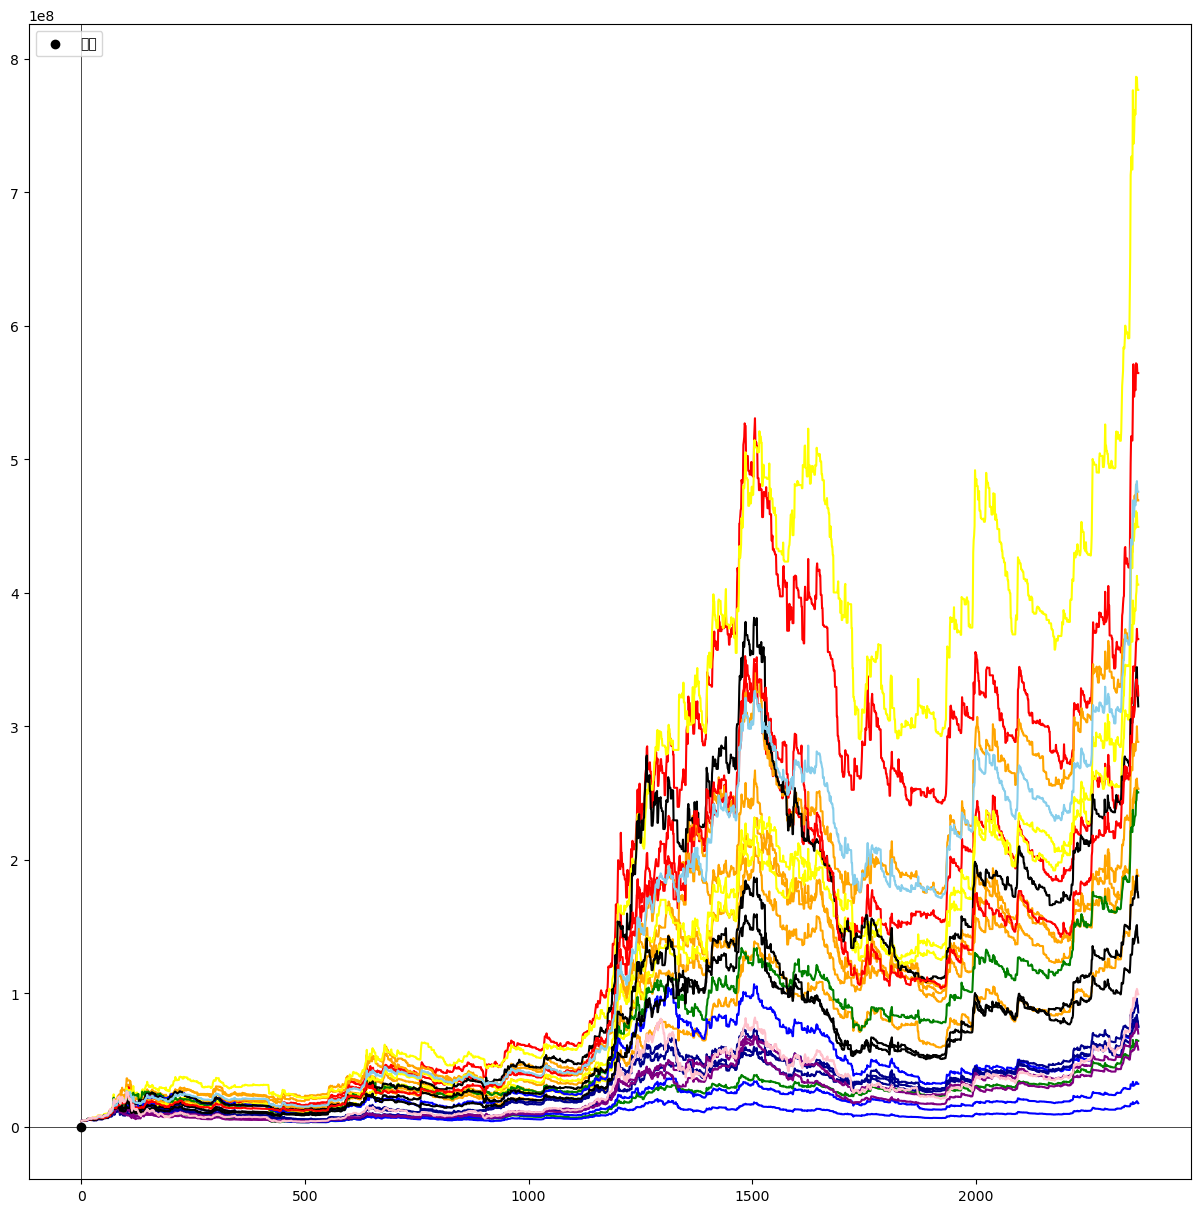

In [73]:
plt.figure(figsize=(15, 15))
plt.axhline(0, color='black',linewidth=0.5)  # x축
plt.axvline(0, color='black',linewidth=0.5)  # y축
plt.scatter(0, 0, color='black', marker='o', label='원점')  # 원점에 점 추가

plt.plot(price_df.index, price_df['price0'], color="red")
plt.plot(price_df.index, price_df['price1'], color="red")
plt.plot(price_df.index, price_df['price2'], color="orange")
plt.plot(price_df.index, price_df['price3'], color="orange")
plt.plot(price_df.index, price_df['price4'], color="orange")
plt.plot(price_df.index, price_df['price5'], color="orange")
plt.plot(price_df.index, price_df['price6'], color="orange")
plt.plot(price_df.index, price_df['price7'], color="yellow")
plt.plot(price_df.index, price_df['price8'], color="yellow")
plt.plot(price_df.index, price_df['price9'], color="yellow")
plt.plot(price_df.index, price_df['price10'], color="green")
plt.plot(price_df.index, price_df['price11'], color="green")
plt.plot(price_df.index, price_df['price12'], color="blue")
plt.plot(price_df.index, price_df['price13'], color="blue")
plt.plot(price_df.index, price_df['price14'], color="blue")
plt.plot(price_df.index, price_df['price15'], color="darkblue")
plt.plot(price_df.index, price_df['price16'], color="darkblue")
plt.plot(price_df.index, price_df['price17'], color="darkblue")
plt.plot(price_df.index, price_df['price18'], color="purple")
plt.plot(price_df.index, price_df['price19'], color="purple")
plt.plot(price_df.index, price_df['price20'], color="black")
plt.plot(price_df.index, price_df['price21'], color="black")
plt.plot(price_df.index, price_df['price22'], color="black")
plt.plot(price_df.index, price_df['price23'], color="red")
#plt.plot(price_df.index, price_df['average'], color="gray")
#plt.plot(price_df.index, price_df['average_am'], color="black")
#plt.plot(price_df.index, price_df['average_pm'], color="silver")
plt.plot(price_df.index, price_df['average_us'], color="skyblue")
plt.plot(price_df.index, price_df['open'], color="pink")
plt.legend(loc='upper left')
plt.show()

In [100]:
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
min_num = min(dff[4:10])
print(min_num)
print(dff[4:10])

4305000.0
4    4308000.0
5    4320000.0
6    4322000.0
7    4320000.0
8    4305000.0
9    4317000.0
Name: open, dtype: float64
